In [1]:
import json

import pandas as pd

In [2]:
train_df = pd.read_csv('data/train.csv')

In [3]:
train_df

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0
...,...,...,...,...,...,...,...,...,...
57472,4294656694,gpt-4-0613,claude-1,"[""A simple mnemonic for \u03c0:\n\""How I wish ...","[""Sure, let's break it down:\n\n1. \""How\"" has...","[""Here is how that mnemonic represents the dig...",1,0,0
57473,4294692063,claude-2.0,llama-2-13b-chat,"[""In python, implement a naive Bayes with gaus...","[""Here is an implementation of a naive Bayes c...","[""Sure! Here's an implementation of a naive Ba...",1,0,0
57474,4294710549,claude-1,alpaca-13b,"[""is it unethical to work on building weapons?...","[""Working on weapons technology raises some et...","[""It depends on the context. Weapons can be us...",1,0,0
57475,4294899228,palm-2,tulu-2-dpo-70b,"[""If a bait contains 0,0025% bromadiolon then ...","[""Bromadiolone is a rodenticide which is most ...","[""As an AI language model, I do not promote or...",0,1,0


In [4]:
def winner(row):
    if row["winner_model_a"] == 1:
        return row["model_a"]
    elif row["winner_model_b"] == 1:
        return row["model_b"]
    else:
        return [row["model_a"], row["model_b"]]

train_df["winner"] = train_df.apply(winner, axis=1)
str_list_columns = ["prompt", "response_a", "response_b"]
for x in str_list_columns:
    train_df[x] = train_df[x].apply(json.loads)

train_df

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner
0,30192,gpt-4-1106-preview,gpt-4-0613,[Is it morally right to try to have a certain ...,[The question of whether it is morally right t...,"[As an AI, I don't have personal beliefs or op...",1,0,0,gpt-4-1106-preview
1,53567,koala-13b,gpt-4-0613,[What is the difference between marriage licen...,[A marriage license is a legal document that a...,[A marriage license and a marriage certificate...,0,1,0,gpt-4-0613
2,65089,gpt-3.5-turbo-0613,mistral-medium,[explain function calling. how would you call ...,[Function calling is the process of invoking o...,[Function calling is the process of invoking a...,0,0,1,"[gpt-3.5-turbo-0613, mistral-medium]"
3,96401,llama-2-13b-chat,mistral-7b-instruct,[How can I create a test set for a very rare c...,[Creating a test set for a very rare category ...,[When building a classifier for a very rare ca...,1,0,0,llama-2-13b-chat
4,198779,koala-13b,gpt-3.5-turbo-0314,[What is the best way to travel from Tel-Aviv ...,[The best way to travel from Tel Aviv to Jerus...,[The best way to travel from Tel-Aviv to Jerus...,0,1,0,gpt-3.5-turbo-0314
...,...,...,...,...,...,...,...,...,...,...
57472,4294656694,gpt-4-0613,claude-1,"[A simple mnemonic for π:\n""How I wish I could...","[Sure, let's break it down:\n\n1. ""How"" has 3 ...",[Here is how that mnemonic represents the digi...,1,0,0,gpt-4-0613
57473,4294692063,claude-2.0,llama-2-13b-chat,"[In python, implement a naive Bayes with gauss...",[Here is an implementation of a naive Bayes cl...,[Sure! Here's an implementation of a naive Bay...,1,0,0,claude-2.0
57474,4294710549,claude-1,alpaca-13b,"[is it unethical to work on building weapons?,...",[Working on weapons technology raises some eth...,[It depends on the context. Weapons can be use...,1,0,0,claude-1
57475,4294899228,palm-2,tulu-2-dpo-70b,"[If a bait contains 0,0025% bromadiolon then h...",[Bromadiolone is a rodenticide which is most o...,"[As an AI language model, I do not promote or ...",0,1,0,tulu-2-dpo-70b


<Axes: >

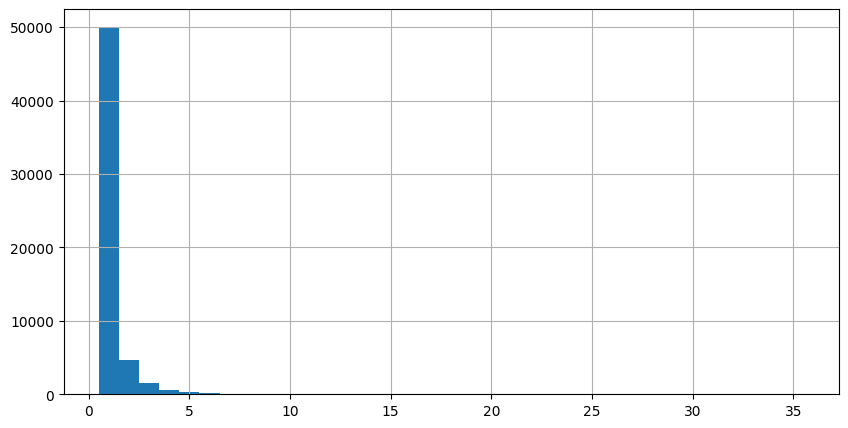

In [5]:
train_df["number_of_turns"] = train_df["prompt"].apply(lambda x: len(x))

# Bin with 1, y-axis as relative count
train_df["number_of_turns"].hist(
    bins=range(1, train_df["number_of_turns"].max() + 1), 
    align='left',
    figsize=(10, 5)
)

<Axes: xlabel='number_of_turns'>

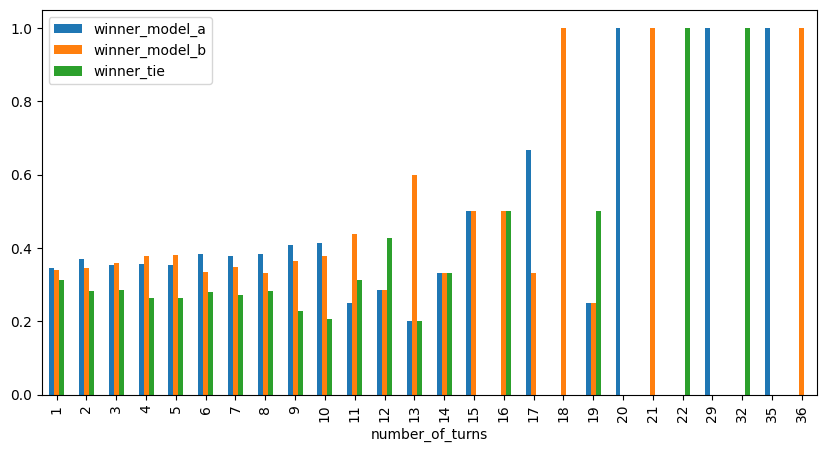

In [15]:
# Group by number_of_turns, and plot the ratio between winner_model_a : winner_model_b : winner_tie
train_df.groupby("number_of_turns")[["winner_model_a", "winner_model_b", "winner_tie"]].mean().plot(
    kind='bar', 
    figsize=(10, 5)
)

In [14]:
# Print the results too
train_df.groupby("number_of_turns")[["winner_model_a", "winner_model_b", "winner_tie"]].sum()


,winner_model_a,winner_model_b,winner_tie
number_of_turns,,,
1,17312,16985,15641
2,1727,1621,1325
3,524,535,426
4,216,230,161
5,110,119,82
6,64,56,47
7,39,36,28
8,23,20,17
9,18,16,10


<Axes: >

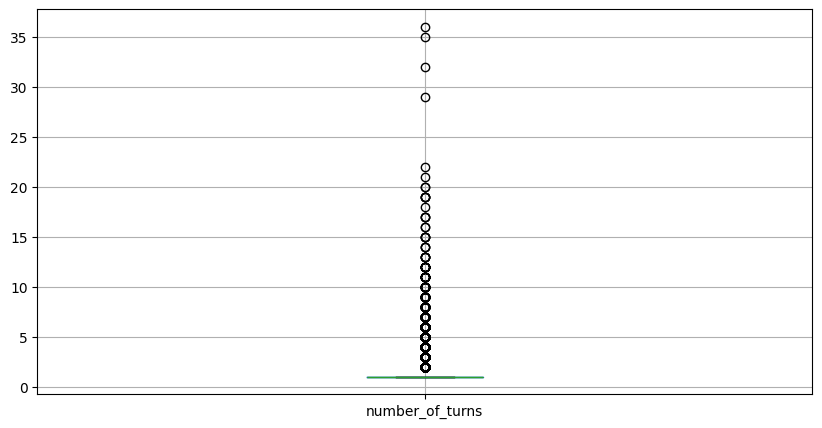

In [6]:
# Plot box-and-whisker plot
train_df.boxplot(column="number_of_turns", figsize=(10, 5))

In [7]:
# Find outliers and return indices of outliers

def find_outliers(df, column):
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

find_outliers(train_df, "number_of_turns")

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,number_of_turns
12,604575,pplx-70b-online,gpt-3.5-turbo-1106,"[was the historical jesus a socialist, was hit...",[The question of whether the historical Jesus ...,[The historical Jesus lived in a time and plac...,0,1,0,gpt-3.5-turbo-1106,6
28,1813737,claude-2.0,claude-2.1,[Are all countries obliged to not conduct nucl...,[There is no absolute obligation for all count...,[There is no universal legal obligation for al...,0,1,0,claude-2.1,10
30,1842252,claude-1,gpt-4-0314,[Estimate the number of dinosaur skeletons in ...,[This is very difficult to estimate precisely ...,[Estimating the exact number of dinosaur skele...,1,0,0,claude-1,5
59,3995635,claude-2.1,claude-2.0,"[What is the moral of Wall-e?, What about love...",[Here's a summary of some of the key morals an...,[Here are some of the key moral lessons and th...,0,0,1,"[claude-2.1, claude-2.0]",5
129,9638121,claude-1,gpt-3.5-turbo-0613,[write a story about a girl and her pet rabbit...,[Here is a short story about a girl and her pe...,"[Once upon a time, in a small village nestled ...",0,1,0,gpt-3.5-turbo-0613,4
...,...,...,...,...,...,...,...,...,...,...,...
57175,4270923962,gpt-3.5-turbo-0613,gpt-4-0314,[Was is common for 6 years old boys in 11 cent...,"[In the 11th century, it was not common for 6-...","[In the 11th century, it was not common for 6-...",0,1,0,gpt-4-0314,7
57405,4290218189,zephyr-7b-alpha,qwen-14b-chat,"[I'm So Meta Even This Acronym, but why, but h...",[Acronym: I'M SO META EVEN THIS ACROnym (I'm s...,"[The phrase ""I'm so meta even this acronym"" is...",0,1,0,qwen-14b-chat,4
57422,4291445966,alpaca-13b,palm-2,[Good afternoon! Please author for me with out...,[Jane and Sarah had been best friends since hi...,"[Sarah: Jane, I have something to tell you.\n\...",1,0,0,alpaca-13b,6
57429,4292005733,vicuna-13b,qwen1.5-72b-chat,[A proton is made up of how many quarks and an...,"[A proton is made up of three quarks: two ""up""...",[A proton is made up of three quarks. Specific...,0,1,0,qwen1.5-72b-chat,4


In [8]:
def print_full_dialogue(row):
    assert len(row["prompt"]) == len(row["response_a"]) == len(row["response_b"])
    for i in range(len(row["prompt"])):
        print(f"-------- Turn {i+1} --------")
        print(f"Prompt: {row['prompt'][i]}")
        print(f"Response A: {row['response_a'][i]}")
        print(f"Response B: {row['response_b'][i]}")

        
print_full_dialogue(train_df.iloc[28])

-------- Turn 1 --------
Prompt: Are all countries obliged to not conduct nuclear weapons testing 
Response A: There is no absolute obligation for all countries to refrain from nuclear weapons testing, but there are some important agreements that restrict testing:

- The Comprehensive Nuclear-Test-Ban Treaty (CTBT) prohibits all nuclear explosions for both civilian and military purposes. It was adopted by the UN General Assembly in 1996 but has not yet entered into force as not all states have ratified it. However, most nuclear powers have implemented moratoriums on testing.

- The Partial Test Ban Treaty of 1963 prohibits nuclear weapons tests in the atmosphere, underwater and in space. This was signed by the Soviet Union, US and UK.

- The Nuclear Non-Proliferation Treaty (NPT) prohibits non-nuclear weapon states from developing or acquiring nuclear weapons. States must pursue nuclear technology only for peaceful purposes.

- There are also regional nuclear-weapon-free zone treaties 

In [9]:
from transformers import AutoTokenizer

model_path = "google/gemma-2-9b-it"

tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.add_eos_token = True  # We'll add <eos> at the end
tokenizer.padding_side = "right"

In [10]:
def process_text(text: list) -> str:
    text = filter(lambda x: x is not None, text) 
    try:
        if text is None:
            return ""
        return " ".join(text)
    except Exception as e:
        print(e)
        print(text)

def process_func(batch):
    prompt = "[prompt]: " + process_text(batch["prompt"])
    response_a = "\n\n[response_a]: " + process_text(batch["response_a"])
    response_b = "\n\n[response_b]: " + process_text(batch["response_b"])
    texts = prompt + response_a + response_b

    return texts

train_df["processed_text"] = train_df.apply(process_func, axis=1)
train_df["n_tokens"] = train_df["processed_text"].apply(lambda x: len(tokenizer(x, return_tensors="pt")["input_ids"][0]))

train_df

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,number_of_turns,processed_text,n_tokens
0,30192,gpt-4-1106-preview,gpt-4-0613,[Is it morally right to try to have a certain ...,[The question of whether it is morally right t...,"[As an AI, I don't have personal beliefs or op...",1,0,0,gpt-4-1106-preview,2,[prompt]: Is it morally right to try to have a...,1162
1,53567,koala-13b,gpt-4-0613,[What is the difference between marriage licen...,[A marriage license is a legal document that a...,[A marriage license and a marriage certificate...,0,1,0,gpt-4-0613,3,[prompt]: What is the difference between marri...,1403
2,65089,gpt-3.5-turbo-0613,mistral-medium,[explain function calling. how would you call ...,[Function calling is the process of invoking o...,[Function calling is the process of invoking a...,0,0,1,"[gpt-3.5-turbo-0613, mistral-medium]",1,[prompt]: explain function calling. how would ...,645
3,96401,llama-2-13b-chat,mistral-7b-instruct,[How can I create a test set for a very rare c...,[Creating a test set for a very rare category ...,[When building a classifier for a very rare ca...,1,0,0,llama-2-13b-chat,1,[prompt]: How can I create a test set for a ve...,1009
4,198779,koala-13b,gpt-3.5-turbo-0314,[What is the best way to travel from Tel-Aviv ...,[The best way to travel from Tel Aviv to Jerus...,[The best way to travel from Tel-Aviv to Jerus...,0,1,0,gpt-3.5-turbo-0314,1,[prompt]: What is the best way to travel from ...,486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57472,4294656694,gpt-4-0613,claude-1,"[A simple mnemonic for π:\n""How I wish I could...","[Sure, let's break it down:\n\n1. ""How"" has 3 ...",[Here is how that mnemonic represents the digi...,1,0,0,gpt-4-0613,1,"[prompt]: A simple mnemonic for π:\n""How I wis...",374
57473,4294692063,claude-2.0,llama-2-13b-chat,"[In python, implement a naive Bayes with gauss...",[Here is an implementation of a naive Bayes cl...,[Sure! Here's an implementation of a naive Bay...,1,0,0,claude-2.0,1,"[prompt]: In python, implement a naive Bayes w...",1003
57474,4294710549,claude-1,alpaca-13b,"[is it unethical to work on building weapons?,...",[Working on weapons technology raises some eth...,[It depends on the context. Weapons can be use...,1,0,0,claude-1,4,[prompt]: is it unethical to work on building ...,1934
57475,4294899228,palm-2,tulu-2-dpo-70b,"[If a bait contains 0,0025% bromadiolon then h...",[Bromadiolone is a rodenticide which is most o...,"[As an AI language model, I do not promote or ...",0,1,0,tulu-2-dpo-70b,1,"[prompt]: If a bait contains 0,0025% bromadiol...",368


1981.0


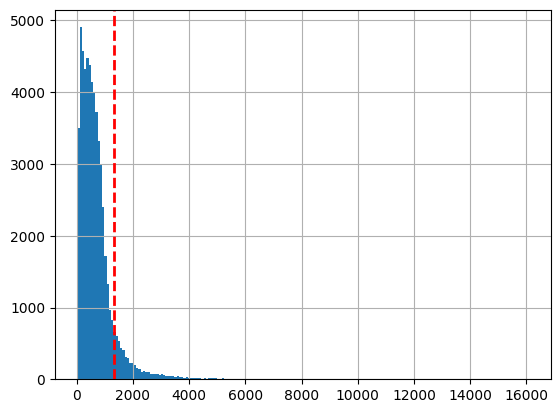

In [11]:
train_df["n_tokens"].hist(bins=200)
# Show 90 percentile as red line

import matplotlib.pyplot as plt

plt.axvline(train_df["n_tokens"].quantile(0.9), color='r', linestyle='dashed', linewidth=2)
# print exact value too
print(train_df["n_tokens"].quantile(0.96))



In [2]:
import json

# Load the json file to pandas
with open("data/clean_battle_20240730_public.json", "r") as f:
    data = json.load(f)

In [5]:
import pandas as pd

df = pd.DataFrame(data)

In [6]:
df

,model_a,model_b,winner,judge,turn,anony,language,tstamp,conv_metadata,is_code,is_refusal,dedup_tag,category_tag
0,chatglm-6b,koala-13b,model_b,2e9c29aa140b8e50643235eab01dc9ea,1,True,English,1.682352e+09,"{'sum_user_tokens': 10, 'sum_assistant_a_token...",True,False,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 1}, 'math_v..."
1,oasst-pythia-12b,alpaca-13b,tie,2e9c29aa140b8e50643235eab01dc9ea,1,True,English,1.682352e+09,"{'sum_user_tokens': 11, 'sum_assistant_a_token...",False,False,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 0}, 'math_v..."
2,koala-13b,oasst-pythia-12b,model_b,2e9c29aa140b8e50643235eab01dc9ea,1,True,English,1.682352e+09,"{'sum_user_tokens': 10, 'sum_assistant_a_token...",False,False,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 0}, 'math_v..."
3,vicuna-13b,oasst-pythia-12b,model_b,2e9c29aa140b8e50643235eab01dc9ea,1,True,English,1.682352e+09,"{'sum_user_tokens': 9, 'sum_assistant_a_tokens...",False,False,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 1}, 'math_v..."
4,vicuna-13b,koala-13b,model_a,2e9c29aa140b8e50643235eab01dc9ea,1,True,English,1.682352e+09,"{'sum_user_tokens': 5, 'sum_assistant_a_tokens...",False,True,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 0}, 'math_v..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667509,llama-3.1-8b-instruct,gpt-4-0613,model_b,aa1c93a1e2a2b6bb628db9b232e7b6d3,2,True,English,1.722355e+09,"{'sum_user_tokens': 49, 'sum_assistant_a_token...",False,False,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 2}, 'math_v..."
1667510,gemma-2-9b-it,gemini-1.5-flash-api-0514,tie (bothbad),b6709aa41d9890363953c199fbc72dc4,1,True,Russian,1.722355e+09,"{'sum_user_tokens': 27, 'sum_assistant_a_token...",False,False,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 2}, 'math_v..."
1667511,gpt-4o-mini-2024-07-18,llama-3.1-405b-instruct,tie,d58650f2c6a41f6d579c08d582e4e808,1,True,unknown,1.722355e+09,"{'sum_user_tokens': 7, 'sum_assistant_a_tokens...",False,False,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 0}, 'math_v..."
1667512,mixtral-8x7b-instruct-v0.1,claude-3-5-sonnet-20240620,model_a,bba00e6a8106cac622128dca5c001851,1,True,English,1.722355e+09,"{'sum_user_tokens': 6, 'sum_assistant_a_tokens...",False,True,"{'high_freq': False, 'sampled': True}","{'if_v0.1': {'if': False, 'score': 0}, 'math_v..."


In [11]:
df.iloc[0]["conv_metadata"]

{'sum_user_tokens': 10,
 'sum_assistant_a_tokens': 171,
 'sum_assistant_b_tokens': 373,
 'context_a_tokens': 10,
 'context_b_tokens': 10,
 'turns': 1}